In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Energy_data.csv')

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Our target variable is heating load i.e Y1 although there are two target variables Y1 and Y2.
X1-X8 are our features, on performing EDA we will gain more insights from the data.

In [43]:
data=df.copy()

In [44]:
data=data.iloc[:,:-1]

In [45]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [47]:
data.shape

(768, 9)

In [48]:
df.isna().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


We can clearly see that there are no null values in the data. As we know that linear regression has certain assumptions one of them being that the data should not have highly correlated features. So let us proceed to check the correlation between the features.

<Axes: >

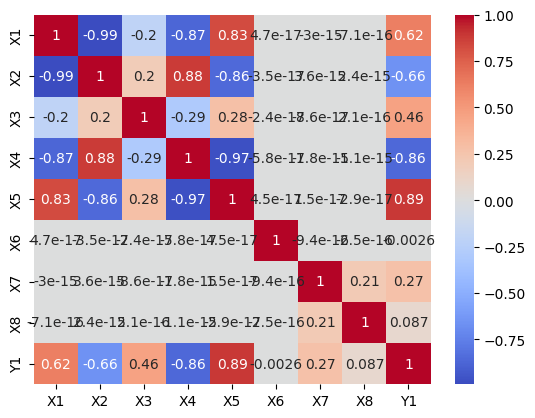

In [49]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

We can clearly see here that X2 and X4 are highly correlated and X1 and X5 are highly correlated. Removing X5 although won't be a good decision as we can see it is highly correlated to our target variable. So we can remove X1 and X4 for better performance of Linear regression model.

In [50]:
data.drop(columns=['X1','X4'],inplace=True)

<Axes: >

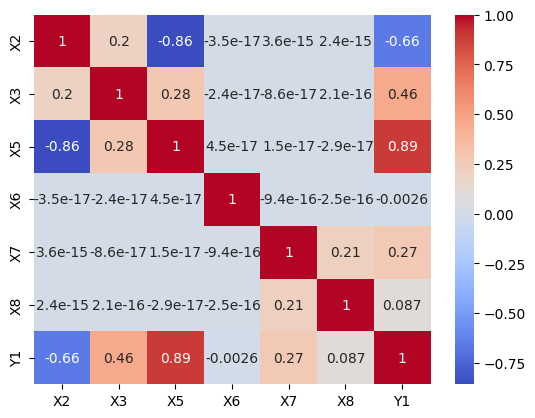

In [51]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: >

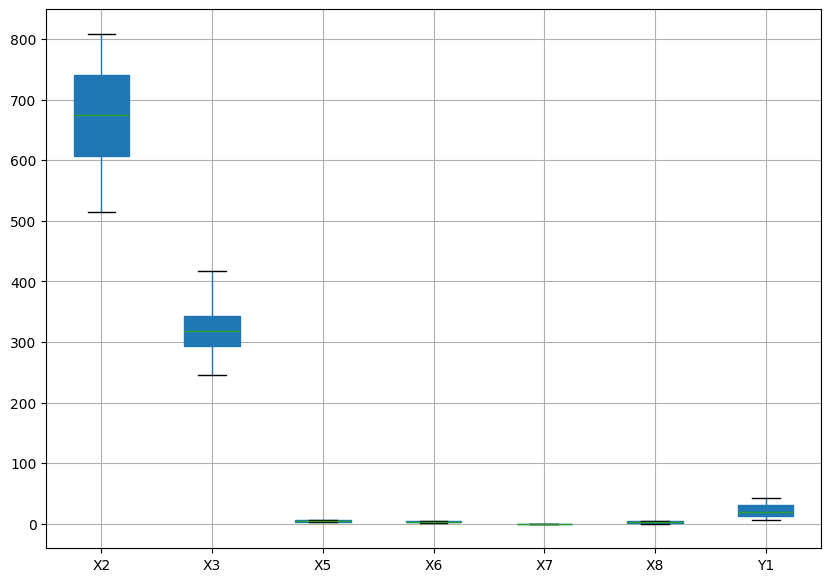

In [52]:
plt.figure(figsize = (10, 7))

data.boxplot(vert=True,patch_artist=True)

In [53]:
for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR=Q3-Q1
  ll=Q1-1.5*IQR
  ul=Q3+1.5*IQR
  data=data[(data[col]>ll)&(data[col]<ul)]

In [54]:
data.shape

(704, 7)

Here we have removed the outliers.

Now moving ahead as we have removed outliers. Another assumption for linear regression is having a normalized data thereby we need to normalize our data for it's better efficiency.

In [55]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pred=lr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(f"Sklearn Linear regression r2 score is {r2}")

Sklearn Linear regression r2 score is 0.8933067110704788


In [60]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2 score for Ridge Regression: {r2_ridge}")

R^2 score for Ridge Regression: 0.893318359414381


In [61]:
lasso = Lasso(alpha=0.1)  # Set alpha to your desired value
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R^2 score for Lasso Regression: {r2_lasso}")

R^2 score for Lasso Regression: 0.8874448279326571


In [62]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred=y_pred,y_true=y_test)
print(f"Root mean square error for sklearn Linear regression is {rmse}")

Root mean square error for sklearn Linear regression is 2.8581295518345526


In [63]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
print(f"Mean square error for sklearn Linear regression is {mse}")

Mean square error for sklearn Linear regression is 8.16890453506998


For mannual model, we need normalized data

In [64]:
class MultiLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
    def coefficients(self):
      return self.coef_

In [65]:
new_lr=MultiLR()

In [66]:
new_lr.fit(X_train,y_train)

In [67]:
y_pred_new=new_lr.predict(X_test)

In [68]:
r2=r2_score(y_test,y_pred_new)
print(f"Mannual Linear regression r2 score is {r2}")

Mannual Linear regression r2 score is 0.8933067110704919


In [69]:
rmse=root_mean_squared_error(y_pred=y_pred_new,y_true=y_test)
print(f"Root mean square error for mannual Linear regression is {rmse}")

Root mean square error for mannual Linear regression is 2.8581295518343763


In [70]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred_new)
print(f"Mean square error for mannual Linear regression is {mse}")

Mean square error for mannual Linear regression is 8.168904535068974


We can clearly see here that the scores we got from linear regression from sklearn and the one we made from scratch almost same.

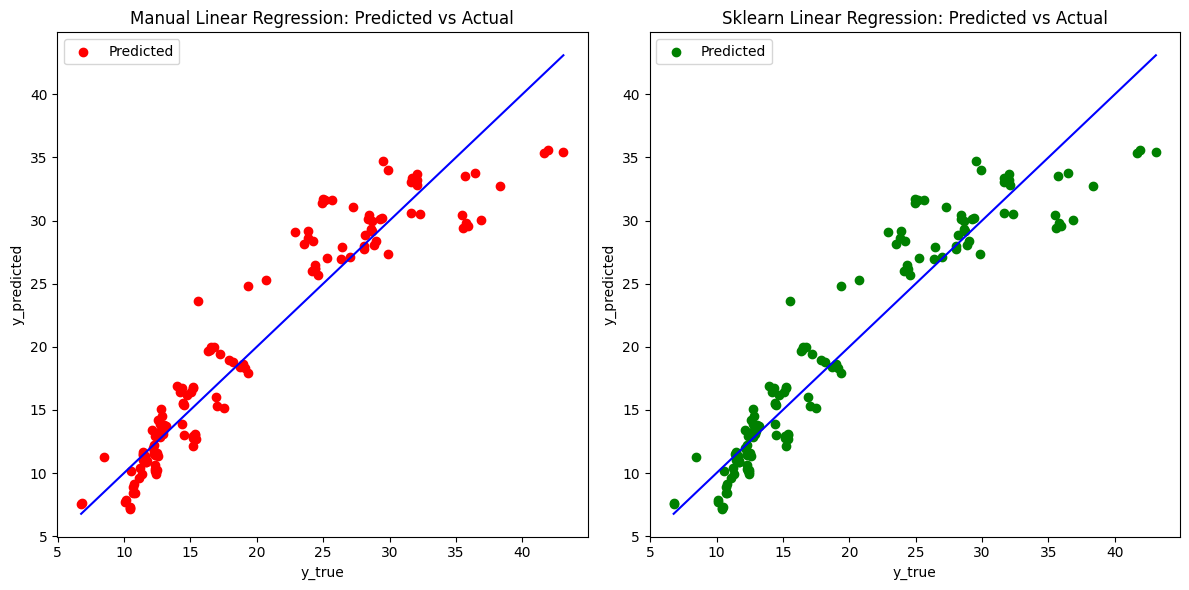

In [71]:
plt.figure(figsize=(12, 6))

# Plot for Manual Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_new, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.xlabel("y_true")
plt.ylabel("y_predicted")
plt.title("Manual Linear Regression: Predicted vs Actual")
plt.legend()

# Plot for Sklearn Linear Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_new, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.xlabel("y_true")
plt.ylabel("y_predicted")
plt.title("Sklearn Linear Regression: Predicted vs Actual")
plt.legend()

plt.tight_layout()
plt.show()

Here we can see almost similiar plots

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

For the answer to this question, let us look at the weights(coefficients) of the model.

In [72]:
new_lr.coefficients()

array([1.64591109e-02, 3.50308430e-02, 5.62964546e+00, 6.45728867e-02,
       1.93179108e+01, 2.07466933e-01])

Here, we can see that the features X8 and X5 that is surface area distribution and Overall height do have comparitively high significance or correlation with our target variable. Also as we know the fact X4 and X5 were highly correlated thereby roof area(X4) is also high signicance.
For better energy efficiency, we need to decrease the heat load which is our target variable, this can be done by decreasing the features that having high weightage(coefficients). Decreasing the roof area, glazing area and overall height can increase the efficiency.

